<a href="https://colab.research.google.com/github/NishatTasnimMim/Heart-Dideases-Alignment/blob/main/complete_heart_disease_classification_deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk(r'C:\Users\User\Downloads\cardiacHealth'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\User\Downloads\cardiacHealth\heart.csv


In [ ]:
df=pd.read_csv(r"C:\Users\User\Downloads\cardiacHealth\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
df.sex[df.target==1].value_counts()

1    93
0    72
Name: sex, dtype: int64

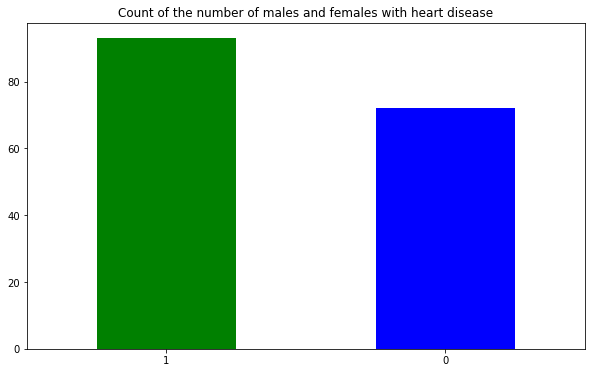

In [ ]:
df.sex[df.target==1].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the number of males and females with heart disease")
plt.xticks(rotation=0);

In [ ]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


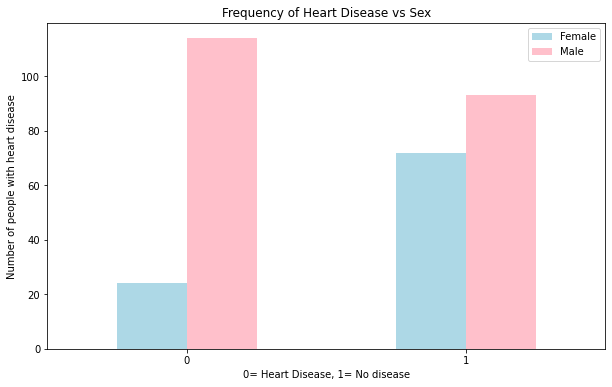

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=["lightblue","pink"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0= Heart Disease, 1= No disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

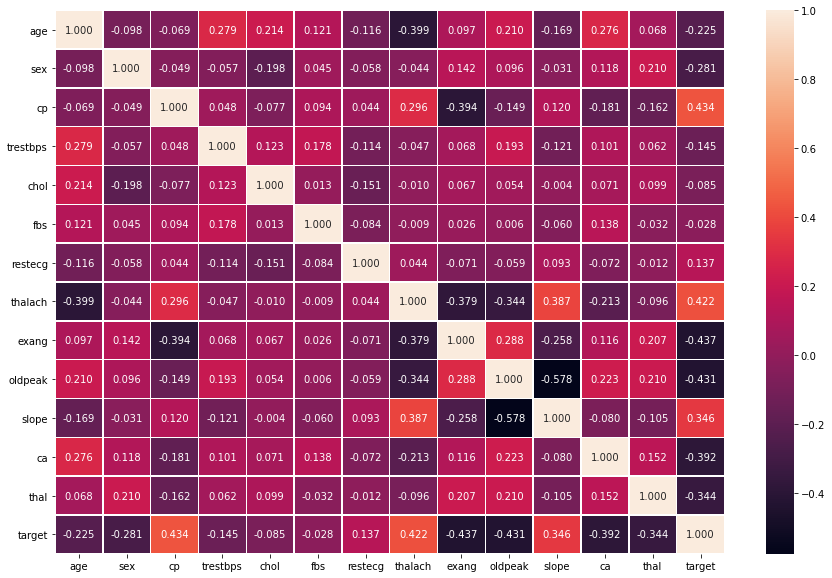

In [ ]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
feat=['age', 	'sex', 	'cp', 'trestbps', 'chol', 	'fbs', 	'restecg', 	'thalach' ,	'exang', 	'oldpeak' ,	'slope', 	'ca', 'thal']
df[feat] = scal.fit_transform(df[feat])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#df[features] = scaler.fit_transform(df[features])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


In [ ]:
X=df.drop("target",axis=1).values
Y=df.target.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix

def evaluation(Y_test,Y_pred):
  acc=accuracy_score(Y_test,Y_pred)
  rcl=recall_score(Y_test,Y_pred)
  f1=f1_score(Y_test,Y_pred)
 

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               
              }

  return print(metric_dict)

#evaluation(Y_test,SVC_Y_pred)

In [ ]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier()
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
#print(Knn_score)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.869, 'recall': 0.912, 'F1 score': 0.886}


In [ ]:
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
LR_clf=LogisticRegression()
LR_clf.fit(X_train,Y_train)
LR_Y_pred=LR_clf.predict(X_test)
LR_score=LR_clf.score(X_test,Y_test)
#print(LR_score)
evaluation(Y_test,LR_Y_pred)

{'accuracy': 0.836, 'recall': 0.912, 'F1 score': 0.861}


In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
RF_clf=RandomForestClassifier(n_estimators=450)
RF_clf.fit(X_train,Y_train)
RF_score=RF_clf.score(X_test,Y_test)
RF_Y_pred=RF_clf.predict(X_test)
#print(RF_score)
evaluation(Y_test,RF_Y_pred)

{'accuracy': 0.869, 'recall': 0.882, 'F1 score': 0.882}


In [ ]:
np.random.seed(42)
from sklearn.svm import SVC
SVC_clf=SVC()
SVC_clf.fit(X_train,Y_train)
SVC_score=SVC_clf.score(X_test,Y_test)
SVC_Y_pred=SVC_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,SVC_Y_pred)

{'accuracy': 0.836, 'recall': 0.941, 'F1 score': 0.865}


In [ ]:
from xgboost import XGBClassifier
XGB_clf=XGBClassifier()
XGB_clf.fit(X_train,Y_train)
XGB_score=XGB_clf.score(X_test,Y_test)
XGB_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,XGB_Y_pred)

[16:42:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'accuracy': 0.787, 'recall': 0.794, 'F1 score': 0.806}


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine',"XGBoost"], 'Accuracy': [LR_score*100,
                    RF_score*100,Knn_score*100,SVC_score*100,XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,83.606557
1,Random Forest,86.885246
2,K-Nearest Neighbour,86.885246
3,Support Vector Machine,83.606557
4,XGBoost,78.688525


In [ ]:
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    print(f"Accuracy with {i} no. of neighbors: {knn.fit(X_train, Y_train).score(X_test,Y_test)}%")

Accuracy with 1 no. of neighbors: 0.8524590163934426%
Accuracy with 2 no. of neighbors: 0.8360655737704918%
Accuracy with 3 no. of neighbors: 0.8688524590163934%
Accuracy with 4 no. of neighbors: 0.8688524590163934%
Accuracy with 5 no. of neighbors: 0.8688524590163934%
Accuracy with 6 no. of neighbors: 0.8524590163934426%
Accuracy with 7 no. of neighbors: 0.9016393442622951%
Accuracy with 8 no. of neighbors: 0.8688524590163934%
Accuracy with 9 no. of neighbors: 0.8524590163934426%
Accuracy with 10 no. of neighbors: 0.8524590163934426%
Accuracy with 11 no. of neighbors: 0.819672131147541%
Accuracy with 12 no. of neighbors: 0.819672131147541%
Accuracy with 13 no. of neighbors: 0.8032786885245902%
Accuracy with 14 no. of neighbors: 0.8360655737704918%
Accuracy with 15 no. of neighbors: 0.8360655737704918%
Accuracy with 16 no. of neighbors: 0.819672131147541%
Accuracy with 17 no. of neighbors: 0.8032786885245902%
Accuracy with 18 no. of neighbors: 0.8032786885245902%
Accuracy with 19 no. o

In [ ]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier(n_neighbors=7)
Knn_clf.fit(X_train,Y_train)
Knn_Y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,Y_test)
evaluation(Y_test,Knn_Y_pred)

{'accuracy': 0.902, 'recall': 0.941, 'F1 score': 0.914}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
for i in range(1,40,1):
  print(f"With {i*10} estimators:")
  clf2=RandomForestClassifier(n_estimators=i*10,max_depth=i,random_state=i).fit(X_train,Y_train)
  print(f"Accuracy: {clf2.score(X_test,Y_test)*100:2f}%")

With 10 estimators:
Accuracy: 77.049180%
With 20 estimators:
Accuracy: 83.606557%
With 30 estimators:
Accuracy: 88.524590%
With 40 estimators:
Accuracy: 86.885246%
With 50 estimators:
Accuracy: 86.885246%
With 60 estimators:
Accuracy: 88.524590%
With 70 estimators:
Accuracy: 83.606557%
With 80 estimators:
Accuracy: 86.885246%
With 90 estimators:
Accuracy: 83.606557%
With 100 estimators:
Accuracy: 86.885246%
With 110 estimators:
Accuracy: 85.245902%
With 120 estimators:
Accuracy: 86.885246%
With 130 estimators:
Accuracy: 85.245902%
With 140 estimators:
Accuracy: 88.524590%
With 150 estimators:
Accuracy: 85.245902%
With 160 estimators:
Accuracy: 83.606557%
With 170 estimators:
Accuracy: 85.245902%
With 180 estimators:
Accuracy: 88.524590%
With 190 estimators:
Accuracy: 85.245902%
With 200 estimators:
Accuracy: 83.606557%
With 210 estimators:
Accuracy: 86.885246%
With 220 estimators:
Accuracy: 85.245902%
With 230 estimators:
Accuracy: 86.885246%
With 240 estimators:
Accuracy: 85.245902%
W

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_clf2=RandomForestClassifier(n_estimators=30,max_depth=3,random_state=3)
RF_clf2.fit(X_train,Y_train)
RF2_acc_score=RF_clf2.score(X_test,Y_test)
RF2_Y_pred=RF_clf2.predict(X_test)
#print(RF2_acc_score)
evaluation(Y_test,RF2_Y_pred)

{'accuracy': 0.885, 'recall': 0.941, 'F1 score': 0.901}


In [ ]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

xgb.fit(X_train,Y_train)
xgb_score=XGB_clf.score(X_test,Y_test)
xgb_Y_pred=XGB_clf.predict(X_test)
#print(SVC_score)
evaluation(Y_test,xgb_Y_pred)

[16:43:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'accuracy': 0.787, 'recall': 0.794, 'F1 score': 0.806}


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1,2, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
gs_clf = GridSearchCV(SVC(), param_grid,cv=5, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gs_clf.fit(X_train, Y_train)

print(gs_clf.best_params_)

print(f"Accuracy score:{gs_clf.score(X_test,Y_test)}%")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.735, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.735, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.854, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.771, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.755, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.531, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.542, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.542, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.542, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.755, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.755, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.875, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.9s finished


In [ ]:
knn_grid={'n_neighbors': np.arange(1,30,1),
          'leaf_size': np.arange(1,50,1)}

gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid,cv=5,verbose=True)

gs_knn.fit(X_train, Y_train)

gs_knn.best_params_

print(f"Accuracy score:{gs_knn.score(X_test,Y_test)*100}%")

Fitting 5 folds for each of 1421 candidates, totalling 7105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score:80.32786885245902%


[Parallel(n_jobs=1)]: Done 7105 out of 7105 | elapsed:   20.2s finished


In [ ]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost'], 'Accuracy': [LR_score*100,
                    RF2_acc_score*100,Knn_score*100,SVC_score*100, XGB_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,83.606557
1,Random Forest,88.524590
2,K-Nearest Neighbour,90.163934
3,Support Vector Machine,83.606557
4,Extreme Gradient Boost,78.688525


In [ ]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[xgb,Knn_clf,RF_clf2],meta_classifier= Knn_clf)
scv.fit(X_train,Y_train)
scv_score=scv.score(X_test,Y_test)
scv_Y_pred=scv.predict(X_test)
#print(SVC_score)
evaluation(Y_test,scv_Y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'accuracy': 0.885, 'recall': 0.941, 'F1 score': 0.901}


In [ ]:
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine','Extreme Gradient Boost', 'StackingCV Classifier'], 'Accuracy': [LR_score*100,
                    RF2_acc_score*100,Knn_score*100,SVC_score*100, XGB_score*100, scv_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,83.606557
1,Random Forest,88.524590
2,K-Nearest Neighbour,90.163934
3,Support Vector Machine,83.606557
4,Extreme Gradient Boost,78.688525
5,StackingCV Classifier,88.524590


In [ ]:
print(" Best evaluation parameters achieved with KNN:") 
evaluation(Y_test,scv_Y_pred)

 Best evaluation parameters achieved with KNN:
{'accuracy': 0.885, 'recall': 0.941, 'F1 score': 0.901}


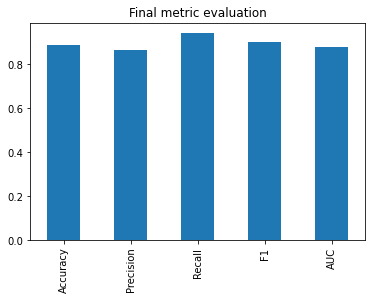

In [ ]:
final_metrics={'Accuracy': scv.score(X_test,Y_test),
                   'Precision': precision_score(Y_test,scv_Y_pred),
                   'Recall': recall_score(Y_test,scv_Y_pred),
                   'F1': f1_score(Y_test,scv_Y_pred),
                   'AUC': roc_auc_score(Y_test,scv_Y_pred)}

metrics=pd.DataFrame(final_metrics,index=[0])

metrics.T.plot.bar(title='Final metric evaluation',legend=False);

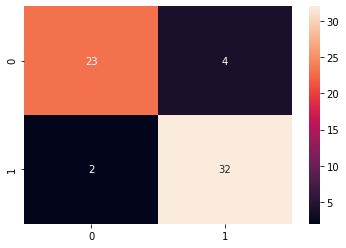

In [ ]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,Knn_Y_pred),annot=True,cbar=True);

In [ ]:
user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scal.transform(user_input)
scv_Y_pred=scv.predict(user_input)
if(scv_Y_pred[0]==0):
  print("Warning! You have chances of getting a heart disease!")
else:
  print("You are healthy and are less likely to get a heart disease!")

Enter the values one by one


ValueError: could not convert string to float: ''

In [ ]:
import pickle as pkl
pkl.dump(Knn_clf,open("final_model.p","wb"))

In [ ]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)


0.23.2


In [ ]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

In [ ]:
%%writefile healthy-heart-app.py
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
#Load the saved model
model=pkl.load(open("final_model.p","rb"))





st.set_page_config(page_title="Healthy Heart App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")



def preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal ):   
 
    
    # Pre-processing user input   
    if sex=="male":
        sex=1 
    else: sex=0
    
    
    if cp=="Typical angina":
        cp=0
    elif cp=="Atypical angina":
        cp=1
    elif cp=="Non-anginal pain":
        cp=2
    elif cp=="Asymptomatic":
        cp=2
    
    if exang=="Yes":
        exang=1
    elif exang=="No":
        exang=0
 
    if fbs=="Yes":
        fbs=1
    elif fbs=="No":
        fbs=0
 
    if slope=="Upsloping: better heart rate with excercise(uncommon)":
        slope=0
    elif slope=="Flatsloping: minimal change(typical healthy heart)":
          slope=1
    elif slope=="Downsloping: signs of unhealthy heart":
        slope=2  
 
    if thal=="fixed defect: used to be defect but ok now":
        thal=6
    elif thal=="reversable defect: no proper blood movement when excercising":
        thal=7
    elif thal=="normal":
        thal=2.31

    if restecg=="Nothing to note":
        restecg=0
    elif restecg=="ST-T Wave abnormality":
        restecg=1
    elif restecg=="Possible or definite left ventricular hypertrophy":
        restecg=2


    user_input=[age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal]
    user_input=np.array(user_input)
    user_input=user_input.reshape(1,-1)
    user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    return prediction

    

       
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Healthy Heart App</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
      
# following lines create boxes in which user can enter data required to make prediction
age=st.selectbox ("Age",range(1,121,1))
sex = st.radio("Select Gender: ", ('male', 'female'))
cp = st.selectbox('Chest Pain Type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic")) 
trestbps=st.selectbox('Resting Blood Sugar',range(1,500,1))
restecg=st.selectbox('Resting Electrocardiographic Results',("Nothing to note","ST-T Wave abnormality","Possible or definite left ventricular hypertrophy"))
chol=st.selectbox('Serum Cholestoral in mg/dl',range(1,1000,1))
fbs=st.radio("Fasting Blood Sugar higher than 120 mg/dl", ['Yes','No'])
thalach=st.selectbox('Maximum Heart Rate Achieved',range(1,300,1))
exang=st.selectbox('Exercise Induced Angina',["Yes","No"])
oldpeak=st.number_input('Oldpeak')
slope = st.selectbox('Heart Rate Slope',("Upsloping: better heart rate with excercise(uncommon)","Flatsloping: minimal change(typical healthy heart)","Downsloping: signs of unhealthy heart"))
ca=st.selectbox('Number of Major Vessels Colored by Flourosopy',range(0,5,1))
thal=st.selectbox('Thalium Stress Result',range(1,8,1))



#user_input=preprocess(sex,cp,exang, fbs, slope, thal )
pred=preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal)




if st.button("Predict"):    
  if pred[0] == 0:
    st.error('Warning! You have high risk of getting a heart attack!')
    
  else:
    st.success('You have lower risk of getting a heart disease!')
    
   



st.sidebar.subheader("About App")

st.sidebar.info("This web app is helps you to find out whether you are at a risk of developing a heart disease.")
st.sidebar.info("Enter the required fields and click on the 'Predict' button to check whether you have a healthy heart")
st.sidebar.info("Don't forget to rate this app")



feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=5,step=1)

if feedback:
  st.header("Thank you for rating the app!")
  st.info("Caution: This is just a prediction and not doctoral advice. Kindly see a doctor if you feel the symptoms persist.") 



Overwriting healthy-heart-app.py


In [ ]:
!nohup streamlit run healthy-heart-app.py &
url = ngrok.connect(port='8501')
url

OSError: Background processes not supported.